In [1]:
# pip install pandas
# pip install matplotlib
# pip install seaborn
# pip install missingno
# pip install sklearn
# pip install impyute

In [2]:
#pip install pmdarima

In [3]:
#pip install sktime

In [4]:
#pip install xgboost

In [5]:
#pip install category-encoders

In [6]:
#pip install feature_engine

In [7]:
#pip install lightgbm

# 라이브러리 import

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from category_encoders.cat_boost import CatBoostEncoder
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from feature_engine.creation import CyclicalTransformer
from sklearn.model_selection import GridSearchCV
import missingno as msno
from sktime.utils.plotting import plot_series
from IPython.display import display_html
from itertools import chain,cycle
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from impyute.imputation.cs import mice
import statsmodels.tsa.api as tsa
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import make_pipeline
import xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, Normalizer

# Load Data

In [9]:
train = pd.read_csv('train.csv', index_col = 'date')
test = pd.read_csv('test.csv', index_col = 'date')

# DataFrame 확인

In [10]:
# 한 셀에 두개 출력을 위한 함수
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [11]:
display_side_by_side(train.head(),test.head(), titles=['Train','Test'])

Train 
 
 
 
 precipitation 
 temp_mean 
 temp_highest 
 temp_lowest 
 PM10 
 PM2.5 
 humidity 
 sunshine_sum 
 sunshine_rate 
 wind_mean 
 wind_max 
 rental 
 
 
 date 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2018-01-01 
 NaN 
 -1.3 
 3.8 
 -5.1 
 34.0 
 17.0 
 39.1 
 8.3 
 86.5 
 1.4 
 3.8 
 4950 
 
 
 2018-01-02 
 NaN 
 -1.8 
 1.8 
 -4.3 
 36.0 
 22.0 
 42.0 
 7.9 
 82.3 
 1.8 
 4.9 
 7136 
 
 
 2018-01-03 
 NaN 
 -4.7 
 -0.4 
 -7.1 
 31.0 
 19.0 
 42.3 
 8.6 
 88.7 
 2.2 
 3.5 
 7156 
 
 
 2018-01-04 
 NaN 
 -4.7 
 -0.7 
 -8.7 
 39.0 
 24.0 
 43.0 
 6.2 
 63.9 
 1.4 
 3.5 
 7102 
 
 
 2018-01-05 
 NaN 
 -3.0 
 1.6 
 -5.6 
 51.0 
 35.0 
 48.4 
 8.2 
 84.5 
 1.7 
 3.6 
 7705 
 
 
 Test 
 
 
 
 precipitation 
 temp_mean 
 temp_highest 
 temp_lowest 
 PM10 
 PM2.5 
 humidity 
 sunshine_sum 
 sunshine_rate 
 wind_mean 
 wind_max 
 
 
 date 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2021-01-01 
 NaN 
 -4.2 
 1.6 
 -9.8 
 30.0 
 17.0 
 64.0 
 6.5 
 67.7 
 2.0 
 4.1 
 
 
 2021-01-02 
 NaN 
 -5.0 
 -1.4 
 -8.4 
 34.0 
 12.0 
 38.5 
 9.0 
 93.8 
 2.6 
 5.4 
 
 
 2021-01-03 
 NaN 
 -5.6 
 -2.0 
 -9.1 
 39.0 
 14.0 
 45.0 
 5.5 
 56.7 
 2.0 
 4.5 
 
 
 2021-01-04 
 0.0 
 -3.5 
 0.3 
 -8.4 
 40.0 
 23.0 
 51.4 
 4.6 
 47.4 
 1.7 
 3.2 
 
 
 2021-01-05 
 0.0 
 -5.5 
 -2.1 
 -9.9 
 30.0 
 17.0 
 52.8 
 8.6 
 88.7 
 2.9 
 5.7

# 결측치 확인

/opt/anaconda3/envs/kaggle/lib/python3.7/site-packages/missingno/missingno.py:62: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  "Plotting a sparkline on an existing axis is not currently supported. "


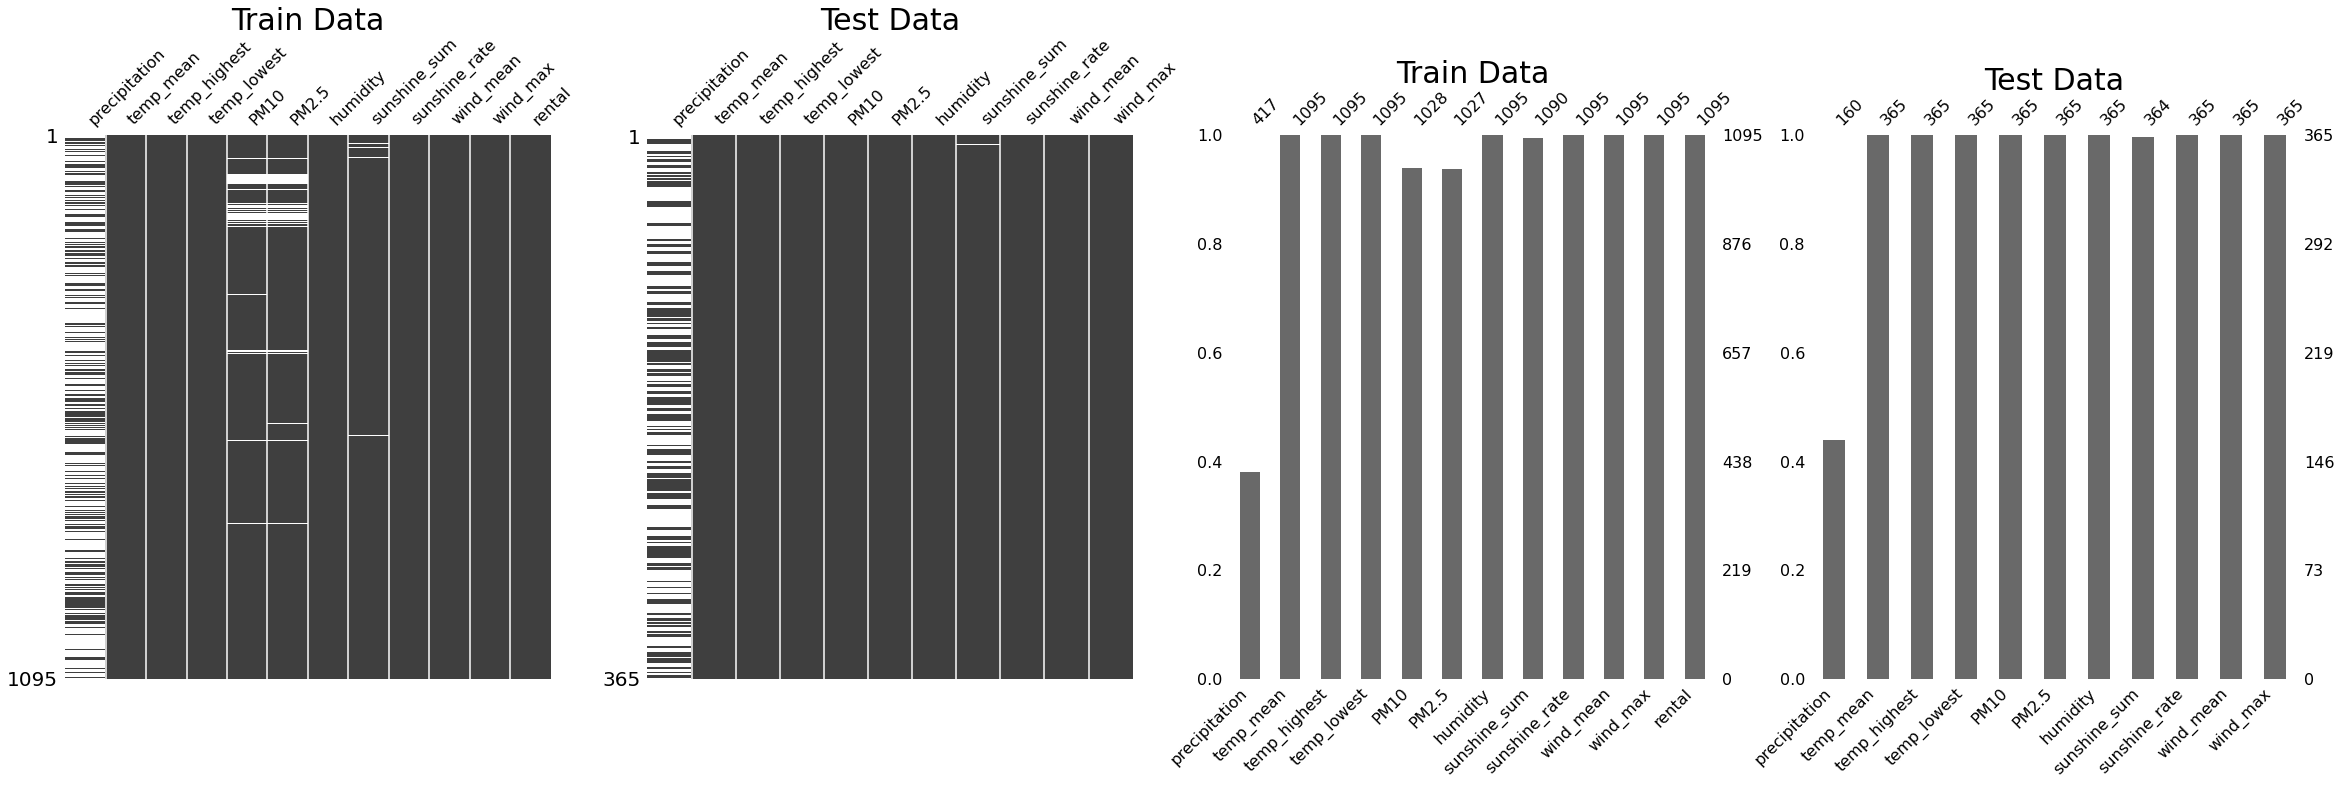

In [12]:
fig , ax = plt.subplots(1,4,figsize= (40,10))

msno.matrix(train, ax=ax[0])
msno.matrix(test, ax=ax[1])

msno.bar(train, ax=ax[2])
msno.bar(test, ax=ax[3])

for i in range(4):
    if i % 2 ==0:
        ax[i].set_title('Train Data', fontsize = 30)
    else:
        ax[i].set_title('Test Data', fontsize = 30)

        
plt.show()

In [13]:
print(f"\033[31mTrain's Missing value \033[30m\n\n{train.isna().sum()}\n\n\033[31mTest's Missing value  \n\n\033[30m{test.isna().sum()}")

Train's Missing value 

precipitation    678
temp_mean          0
temp_highest       0
temp_lowest        0
PM10              67
PM2.5             68
humidity           0
sunshine_sum       5
sunshine_rate      0
wind_mean          0
wind_max           0
rental             0
dtype: int64

Test's Missing value  

precipitation    205
temp_mean          0
temp_highest       0
temp_lowest        0
PM10               0
PM2.5              0
humidity           0
sunshine_sum       1
sunshine_rate      0
wind_mean          0
wind_max           0
dtype: int64


# 결측치 채우기
## precipitation = 0으로 채우기
## Sunshine_sum
## PM : 다양한 방법으로 채워보려고 함
## 문제점)
### (1) 근거가 있나? 해당날짜 기사를 확인했다 -> 원본데이터 확인과 뭐가 다른지 모르겠음
### (2) 결측치 채우는 것이 비단 Train data 뿐만 아니라 test data 에서도 적용되는데, test data의 precipitation 을 0으로 다 채우는               게 일리가 있을까?
### (3) 논의 해 볼 내용,, ( 방법을 아직 모르겠음)

### precipitation

# 일단은 0으로 강수량 채움

In [14]:
train['precipitation'].fillna(0,inplace = True)

In [15]:
train['precipitation'].isna().sum()

0

## Sunshine_sum
### sunshine rate 가 0 일때, sunshine sum 이 0 이 아닌 적이 없었으므로, 0으로 채워줌

In [16]:
train

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental
date,,,,,,,,,,,,
2018-01-01,0.0,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950
2018-01-02,0.0,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136
2018-01-03,0.0,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156
2018-01-04,0.0,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102
2018-01-05,0.0,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.0,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103
2020-12-28,1.3,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912
2020-12-29,0.2,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747


In [17]:
train['sunshine_sum'].fillna(0, inplace = True)

## PM10, PM2.5 
### 다중대체

In [18]:
dummy = pd.get_dummies(train)
train_mul = pd.DataFrame(IterativeImputer(verbose=False).fit_transform(dummy))
train_mul.index = train.index
train_mul.columns = train.columns

In [19]:
target = 'rental'
features = train_mul.columns.drop([target])
# train dataset

X_train = train_mul[features].iloc[:995]
y_train = train_mul[target].iloc[:995]

# validation dataset

X_val = train_mul[features].iloc[995:]
y_val = train_mul[target].iloc[995:]

## LinearRegression

In [20]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [21]:
y_val.index = list(range(995,1095))
y_pred = pd.Series(y_pred)
y_pred.index = list(range(995,1095))
y_train.index = range(0,995)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='rental'>)

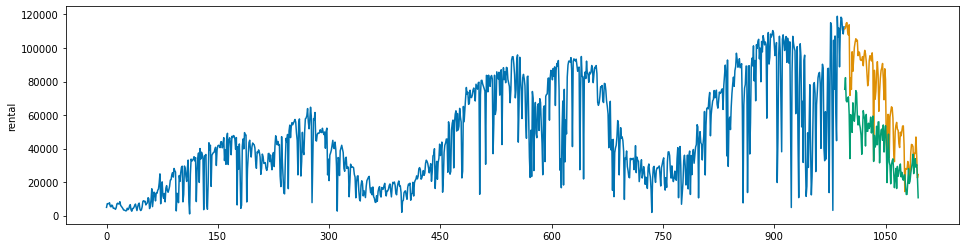

In [22]:
plot_series(y_train, y_val, y_pred, markers=['']*3)

In [23]:
def NMAE(true,pred):
    return np.mean(np.abs(true - pred) / true)

In [24]:
NMAE(y_val,y_pred)

0.38282601864140553

# XGB regressor (결측치 안채워도 알아서 어느정도 해줌. 따라서 확실한 것만 사용)

## Train / Val / Test 적용 함수

In [25]:
# data를 Train,Validation set 으로 나누고 target과 features를 분리.

def divide_data(df):
    target = 'rental'
    features = df.columns.drop([target])
    X_train = df[features].iloc[:729]
    y_train = df[target].iloc[:729]
    X_val = df[features].iloc[729:]
    y_val = df[target].iloc[729:]
    return X_train, y_train, X_val, y_val

def only_divide(df):
    target = 'rental'
    features = df.columns.drop([target])
    X_train = df[features]
    y_train = df[target]
    return X_train, y_train
# date에 해당하는 새로운 컬럼들 생성

def mkdate(df):
    def is_weekend(t):
        if t.weekday() >=5:
            return 1
        else:
            return 0
    df['date'] = df.index
    df['date'] = pd.to_datetime(df['date'])
    df['date_year'] = df.date.apply(lambda t : t.year)
    df['date_Month'] = df.date.apply(lambda t: t.month)
    df['date_day'] = df.date.apply(lambda t: t.day)
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week
    df['is_weekend'] = df.date.apply(lambda t: is_weekend(t))
    return df

# 불쾌지수 컬럼 생성

def discomport_idx(df): 
    df['humidity'] = df['humidity'] / 100 
    df['discomfort'] = ((9/5) * df['temp_mean']) - 0.55 * (1 - df['humidity']) * (((9/5) * df['temp_mean']) - 26) + 32 
    df['discomfort'] = round(df['discomfort'],1)
    return df


#date, 불쾌지수 컬럼 생성
def mkcol(df):
    df = discomport_idx(df)
    return df
    
# datetime64 type Dropb

def drop_t(df):
    df.drop(columns = 'date',inplace = True)
    return df

### day, month cycling encoding 생각해보기 => 나중에~

In [26]:
def create_date_features(df):
    df['month'] = df.date.dt.month.astype("int8")
    df['day_of_month'] = df.date.dt.day.astype("int8")
    df['day_of_year'] = df.date.dt.dayofyear.astype("int16")
    df['week_of_month'] = (df.date.apply(lambda d: (d.day-1) // 7 + 1)).astype("int8")
    df['week_of_year'] = (df.date.dt.weekofyear).astype("int8")
    df['day_of_week'] = (df.date.dt.dayofweek + 1).astype("int8")
    df['year'] = df.date.dt.year.astype("int32")
    df["is_wknd"] = (df.date.dt.weekday // 4).astype("int8")
    df["quarter"] = df.date.dt.quarter.astype("int8")
    df['is_month_start'] = df.date.dt.is_month_start.astype("int8")
    df['is_month_end'] = df.date.dt.is_month_end.astype("int8")
    df['is_quarter_start'] = df.date.dt.is_quarter_start.astype("int8")
    df['is_quarter_end'] = df.date.dt.is_quarter_end.astype("int8")
    df['is_year_start'] = df.date.dt.is_year_start.astype("int8")
    df['is_year_end'] = df.date.dt.is_year_end.astype("int8")
    # 0: Winter - 1: Spring - 2: Summer - 3: Fall
    df["season"] = np.where(df.month.isin([12,1,2]), 0, 1)
    df["season"] = np.where(df.month.isin([6,7,8]), 2, df["season"])
    df["season"] = pd.Series(np.where(df.month.isin([9, 10, 11]), 3, df["season"])).astype("int8")
    return df

In [27]:
train.reset_index(inplace = True)

In [28]:
train['date']=train['date'].astype({'date': 'datetime64[ns]'})

In [29]:
train = create_date_features(train)

/opt/anaconda3/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [30]:
train = mkcol(train)

In [31]:
train.columns

Index(['date', 'precipitation', 'temp_mean', 'temp_highest', 'temp_lowest',
       'PM10', 'PM2.5', 'humidity', 'sunshine_sum', 'sunshine_rate',
       'wind_mean', 'wind_max', 'rental', 'month', 'day_of_month',
       'day_of_year', 'week_of_month', 'week_of_year', 'day_of_week', 'year',
       'is_wknd', 'quarter', 'is_month_start', 'is_month_end',
       'is_quarter_start', 'is_quarter_end', 'is_year_start', 'is_year_end',
       'season', 'discomfort'],
      dtype='object')

In [32]:
X_train,y_train,X_val,y_val = divide_data(train)

In [33]:
X_train.drop(columns ='date', inplace = True)

AttributeError: 'DataFrame' object has no attribute 'rental'

In [36]:
import lightgbm as lgb

boostmodel = lgb.LGBMRegressor()
params = {
    'num_leaves': [7, 14, 21, 28, 31, 50],
    'learning_rate': [0.1, 0.03, 0.003],
    'max_depth': [-1, 3, 5],
    'n_estimators': [50, 100, 200, 500],
}
grid = GridSearchCV(boostmodel(random_state=0), params, scoring='mean_absolute_error', cv=5)
grid.fit(X_train, y_train)

OSError: dlopen(/opt/anaconda3/envs/kaggle/lib/python3.7/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /opt/anaconda3/envs/kaggle/lib/python3.7/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)

boosting  = XGBRegressor()

dists = {'n_estimators' : [500,800,1000], 
         'eta' : [0.35,0.4,0.45],
         'min_child_weight' : np.arange(1, 8, 3), 
         'max_depth' : np.arange(3,9,3) , 
         'colsample_bytree' :np.arange(0.5, 1.0, 0.2), 
         'subsample' :np.arange(0.5, 1.0, 0.2)
}

clf = GridSearchCV(
    estimator = boosting, 
    param_grid = dists,
    refit=True, 
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

In [ ]:
print('최적 파라미터: ',clf.best_params_)

In [ ]:
clf.best_score_

In [ ]:
X_val.drop(columns='date',inplace = True)

In [ ]:
model_xg = clf.best_estimator_

In [ ]:
y_pred = model_xg.predict(X_val)

In [ ]:
y_val.index = list(range(729,1095))
y_pred = pd.Series(y_pred)
y_pred.index = list(range(729,1095))
y_train.index = range(0,729)
plot_series(y_train, y_val, y_pred, markers=['']*3)
print(NMAE(y_val,y_pred))

In [ ]:
test = mkcol(test)
test.weekofyear = test.weekofyear.astype(int)
test = drop_t(test)

In [ ]:
model_1 = XGBRegressor(colsample_bytree= 0.5, eta= 0.05, max_depth= 3, min_child_weight= 1, n_estimators= 1000, subsample= 0.5)

In [ ]:
X_train, y_train= only_divide(train)

In [ ]:
X_train

In [ ]:
X_train= mkcol(X_train)
X_train = drop_t(X_train)
X_train.weekofyear
X_train

In [ ]:
model_1.fit(X_train,y_train)

In [ ]:
pred_all= model_1.predict(test)

In [ ]:
np.round(pred_all)

In [ ]:
sub_0623 = pd.read_csv('subm3.csv',index_col = 'date')

In [ ]:
sub_0623

In [ ]:
sub_0623.rental = sub_0623.rental.astype(int)

In [ ]:
sub_0623.to_csv('sub_0623.csv')

In [ ]:
sub_0623.rental = sub_0623.rental + 9500

In [ ]:
sub_0623.to_csv('sub_0623_Add.csv')